# 2.6. Практическое занятие №3.
## Построение моделей бинарной классификации и анализ их точности

### 1. Загружаем библиотеки pandas, numpy, matplotlib необходимые для решения задачи

In [ ]:
!pip install pandoc

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 127.0/127.0 kB 1.9 MB/s eta 0:00:00
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33288 sha256=96fd4a117925f8392cdb6efdfae8a22b3cad362b1b3c0af52a61f87a8ee05ba1
  Stored in directory: c:\users\bashk\appdata\local\pip\cache\wheels\df\68\e2\574df0737a398965be3a1977499bbda7a841a4605d8dda34d2
Successfully built pandoc


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Загружаем данные

In [2]:
bashkatova = pd.read_csv("train.csv")
bashkatova.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Проверяем данные (ифнормация о типах и кол-ве пропущенных значений)

In [3]:
bashkatova.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Для полей Age, Cabin, Embarked есть пропуски.

Проверяем насколько заполнено поле Age:

In [4]:
bashkatova.PassengerId[bashkatova.Age.notnull()].count()

714

Заполняем пустые значения медианными значениями возраста пассажиров.

In [5]:
medianAge = bashkatova.Age.median()
print(medianAge)

28.0


In [6]:
bashkatova.Age[bashkatova.Age.isnull()] = medianAge

C:\Users\Bashk\AppData\Local\Temp\ipykernel_7740\3559879876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bashkatova.Age[bashkatova.Age.isnull()] = medianAge


Поле Cabin содержит номера кают. Определим у каких пассажиров отсутствует информация о номерах кают. Используем оператор, который выбирает значения поля PassengerId, которым соответствуют неопреленные значения поля Cabin.

In [7]:
Cab=bashkatova['PassengerId'][bashkatova['Cabin'].notnull()]
Cab.head(7)

1      2
3      4
6      7
10    11
11    12
21    22
23    24
Name: PassengerId, dtype: int64

Число неопределенных значений определим с помощью оператора shape.

In [8]:
print(Cab.shape[0])

204


Т.к. число пропцщенных значений 204 из 890, но данное поле при анализе может быть бесполезным.

Проверяем есть ли пассажиры, у которых не указан порт посадки.

In [9]:
bashkatova[bashkatova.Embarked.isnull()].shape[0]

2

Присваиваем таким пассажирам порт, в котором село больше всего людей.

In [10]:
MaxPassEmb = bashkatova.groupby('Embarked').count()['PassengerId']
MaxPassEmb

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

In [11]:
Port=MaxPassEmb[MaxPassEmb == MaxPassEmb.max()].index[0]
print(Port)

S


In [12]:
bashkatova.Embarked[bashkatova.Embarked.isnull()] = Port

C:\Users\Bashk\AppData\Local\Temp\ipykernel_7740\4168732869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bashkatova.Embarked[bashkatova.Embarked.isnull()] = Port


Проверяем поле с ценой на наличие пустых значений

In [13]:
bashkatova.PassengerId[bashkatova.Fare.isnull()].shape[0]

0

### 2. Преобразовываем категориальные признаки в числовыес помощью класса *LabelEncoder()*. 
<br>
 * *Суть функции преобразования данного класса заключается в том, что на вход ей подается список значений, который надо закодировать (например, текстовые переменные), а на выходе получается список индексов, каждый из которых являются кодом уникальных значений поданного на вход списка. Первым делом объявляем класс LabelEncoder*

In [14]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()

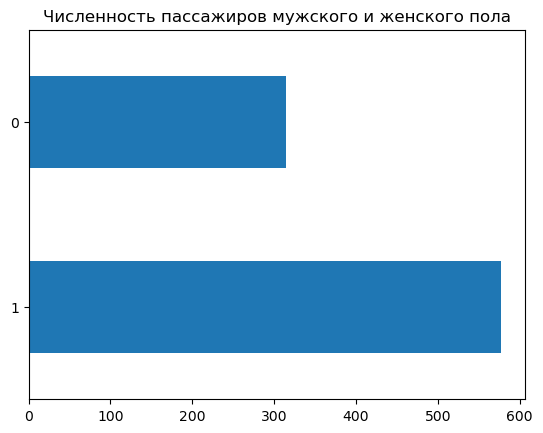

In [15]:
mapped_sex = pd.Series(la.fit_transform(bashkatova['Sex']))
mapped_sex.value_counts().plot.barh()
plt.title("Численность пассажиров мужского и женского пола")
plt.show()

Уникальные индексы поля Sex и их текстовые значения. Создаем словарь с именем dicts

In [16]:
dicts = {}
dicts=dict(enumerate(la.classes_)) 
print(dicts)

{0: 'female', 1: 'male'}


Полученный массив числовых индексов поля Sex загружаем в таблицу,заменяя текстовые значения поля.

In [17]:
bashkatova['Sex'] = mapped_sex
bashkatova.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


Преобразовываем значения поля Embarked в числовые значения.

In [18]:
bashkatova['Embarked'] = la.fit_transform(bashkatova['Embarked'])
bashkatova.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


### 3. Удаляем индекс пассажира, номер билета и имя пассажира, т.к. это просто справочная информация, а по полю номер билета очень много пропущенной информации.

In [19]:
bashkatova = bashkatova.drop(['PassengerId', 'Name','Ticket','Cabin'], axis=1)
bashkatova.head(8)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
5,0,3,1,28.0,0,0,8.4583,1
6,0,1,1,54.0,0,0,51.8625,2
7,0,3,1,2.0,3,1,21.0750,2


### 4. Преобразуем поле Survived в массив ответов ytall, затем удалим это поле из таблицы и полученную таблицу преобразуем в массив независимых показателей.

In [20]:
clDrop = 'Survived'
ytall = bashkatova[clDrop].values
bashkatova.drop(clDrop, axis=1, inplace=True)
xtall = bashkatova.values

### 5. Полученный массив разбиваем на обучающие и тестовые. <br> *25%* последних записей используем как тестовую выборку.

In [21]:
Mtest=int(len(bashkatova)/4)
Mtrain= int(len(bashkatova)-Mtest)
print(len(bashkatova), Mtrain, Mtest)

891 669 222


Создаем массив индексов для тестовой (ttest) и обучающей (ttrain) выборок с помощью функции arange библиотеки numpy и распечатываем их.

In [22]:
ttrain = np.arange(Mtrain)
ttest = np.arange(Mtest) + Mtrain 
print(ttrain)
print(ttest)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

Индексы тестовой выборк

In [23]:
print(ytall[ttest])

[1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0
 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1
 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0]


### 6. После обработки данных приступаем к построению модели

Обучать модель будем на обучающей выборке, после чего проверим ее на тестовой выборке/

Загружаем необходимые библиотеки

In [24]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
from sklearn import tree

### 7. Построение модели прогноза вероятности спасения пассажиров 

Для обучения будем использовать метод fit(). В качестве аргументов используем массив независимых показателей xtall[ttrain] и ответы ytall[ttrain] обучающей выборки

In [25]:
dtc = tree.DecisionTreeClassifier(max_depth = 8, max_features = 7) 
dtc = dtc.fit(xtall[ttrain], ytall[ttrain])

После обучение выполним прогнозирование как на тестовой так и на обучающей выборке, используя функцию predict_proba(). Функция predict_proba() возвращает вероятности принадлежности объектов к классу. После это оценим точность прогноза с помощью функции score().

In [26]:
ytrainDtc = dtc.predict_proba(xtall[ttrain])
ytestDtc = dtc.predict_proba(xtall[ttest])

sc0 = dtc.score(xtall[ttrain], ytall[ttrain])
sc1 = dtc.score(xtall[ttest], ytall[ttest])

print("DesicionTree", "i_fold =", "Точность обучения", sc0, "Точность тестовая", sc1)

DesicionTree i_fold = Точность обучения 0.9133034379671151 Точность тестовая 0.8063063063063063


### 8. Распечатаем результаты прогноза, полученные на тестовой выборке. Вероятности принадлежности пассажиров к классам для тестовой выборки

In [27]:
for i in np.arange(len(ttest)):
    it=ttest[i]
    print("Пассажир ", it, "Вероятности ", ytestDtc[i], "Правильный ответ ", ytall[it])

Пассажир  669 Вероятности  [0. 1.] Правильный ответ  1
Пассажир  670 Вероятности  [0. 1.] Правильный ответ  1
Пассажир  671 Вероятности  [0.65957447 0.34042553] Правильный ответ  0
Пассажир  672 Вероятности  [0.8 0.2] Правильный ответ  0
Пассажир  673 Вероятности  [0.90243902 0.09756098] Правильный ответ  1
Пассажир  674 Вероятности  [1. 0.] Правильный ответ  0
Пассажир  675 Вероятности  [1. 0.] Правильный ответ  0
Пассажир  676 Вероятности  [0.90243902 0.09756098] Правильный ответ  0
Пассажир  677 Вероятности  [1. 0.] Правильный ответ  1
Пассажир  678 Вероятности  [1. 0.] Правильный ответ  0
Пассажир  679 Вероятности  [1. 0.] Правильный ответ  1
Пассажир  680 Вероятности  [0.13043478 0.86956522] Правильный ответ  0
Пассажир  681 Вероятности  [0.65957447 0.34042553] Правильный ответ  1
Пассажир  682 Вероятности  [0.90243902 0.09756098] Правильный ответ  0
Пассажир  683 Вероятности  [1. 0.] Правильный ответ  0
Пассажир  684 Вероятности  [1. 0.] Правильный ответ  0
Пассажир  685 Вероятно

### 9. Пробуем сами оценить точность решения. 
Для этого считаем число правильно спрогнозированных пассажиров, которые спаслись и утонули.  Для оценки точности создаем функцию, где в качестве аргументов передаем вероятности прогноза принадлежности пассажира к классу 1 («Утонул») и пороговое значение. Если вероятность прогноза превышает пороговое значение, значит пассажир принадлежит классу 1.

In [28]:
def estim(y_prob,y_exact, pr):
    kall=y_prob.shape[0]
    tp=0
    fp=0
    tn=0
    fn=0
    kr=0
    for i in np.arange(kall):
        if(y_prob[i] > pr):
            if(y_exact[i] == 1 ): 
                tp+=1
            else:
                fp+=1
        else:
            if(y_exact[i] == 0 ):
                tn+=1
            else:
                fn+=1
        kr=1.*(tp+tn)/kall
    kr1=1.*tp/(tp+fp)
    kr0=1.*tn/(tn+fn)
    rr1=1.*tp/(tp+fn)
    rr0=1.*tn/(tn+fp)
    print("Precission: ", kr0, "класс 0 спаслись", tn+fn, 
          " Из них правильно спрогнозировано =", tn, ", ошибочно=", fn)
    print("Precission: ", kr1,"класс 1 утонуло", tp+tn, 
          " Из них правильно спрогнозировано =", tp, ", ошибочно=", tn)
    print("Recall: ", rr0,"класс 0 спаслись")
    print("Recall: ", rr1,"класс 1 утонуло")
    print("Точность распознавания ",kr, " precission", "recall")
    return kr

*tn* – число правильно идентифицированных пассажиров, как спасшихся, <br> *fn* – число пассажиров, которые были неправильно идентифицированы, как спасшиеся, <br> *kall* - общее число пассажиров, <br> *tp* – число правильно идентифицированных пассажиров, как утонувшие, <br> *fp* – число пассажиров, которые были неправильно идентифицированы, как утонувшие. <br>  Точность прогноза равна сумме *tp* и *tn*, деленной на общее число пассажиров

### 10. Оцените точность прогноза с помощью функции *estim()*. 
Для этого используем оператор:

In [29]:
estim(ytestDtc[:,1], ytall[ttest], 0.5)

Precission:  0.8299319727891157 класс 0 спаслись 147  Из них правильно спрогнозировано = 122 , ошибочно= 25
Precission:  0.76 класс 1 утонуло 179  Из них правильно спрогнозировано = 57 , ошибочно= 122
Recall:  0.8714285714285714 класс 0 спаслись
Recall:  0.6951219512195121 класс 1 утонуло
Точность распознавания  0.8063063063063063  precission recall


0.8063063063063063

*В качестве прогнозных значений передаем второй столбец массива ytestDtc. Пороговое значение равно 0.5
Точность распознавания соответствует точности, полученной выше с помощью функции score()* (пункт7)

### 11. Библиотеки машинного обучения содержат достаточно много функций позволяющих оценить точность. Одна из них accuracy_score(). 
Но в этой функции вместо вероятностной оценки нужно использовать бинарную оценку прогнозирования спасения пассажиров. Для этого используем функцию argmax(), которая возвращает индекс элемента массива с максимальным значением.


In [30]:
pred=[]
for x in ytestDtc:
    pred.append(np.argmax(x)) 

Проверим правильность оценки точность прогноза.

In [31]:
acc= accuracy_score(ytall[ttest], pred) 
print("Точность (accuracy)", acc)

Точность (accuracy) 0.8063063063063063


### 12. Используем для оценки точности функции classification_report() и confusion_matrix(). 
Для их использования необходимо сформировать метки классов (массив lab).

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
nclass = 2
lab = ["Спаслись", "Утонули"]
print(classification_report( ytall[ttest], pred, target_names=lab, digits=4))
print(confusion_matrix( ytall[ttest] , pred, labels=range(nclass)))

              precision    recall  f1-score   support

    Спаслись     0.8299    0.8714    0.8502       140
     Утонули     0.7600    0.6951    0.7261        82

    accuracy                         0.8063       222
   macro avg     0.7950    0.7833    0.7881       222
weighted avg     0.8041    0.8063    0.8044       222

[[122  18]
 [ 25  57]]


### 13. При конвертации вероятности принадлежности к классу в бинарную метку, выбираем какой-либо порог, при котором 0 становится 1. Естественным и близким кажется порог, равный 0.5, но он может оказаться не оптимальным.

Одним из способов оценить модель в целом, не привязываясь к конкретному порогу, является метрика AUC-ROC (или ROC AUC), которая представляет площадь под кривой ошибок. Данная кривая представляет из себя 
линию от (0;0) до (1;1) в координатах True Positive Rate (TPR) и False Positive Rate (FPR). 
<br> Для построения ROC AUC кривой используйте функцию roc_curve(). У этой функции три обязательных аргумента: массив правильных ответов, массив вероятностей ответов положительного класса и индекс класса положительных примеров. В качестве положительного класса используется 2 
класс (индекс равен 1). 
<br> Функция возвращает три массива:
1) массив роста положительных примеров, классифицированные как отрицательные;
2) массив роста верно классифицированных положительных примеров (так называемые истинно положительные случаи);
3) массив пороговых значений.


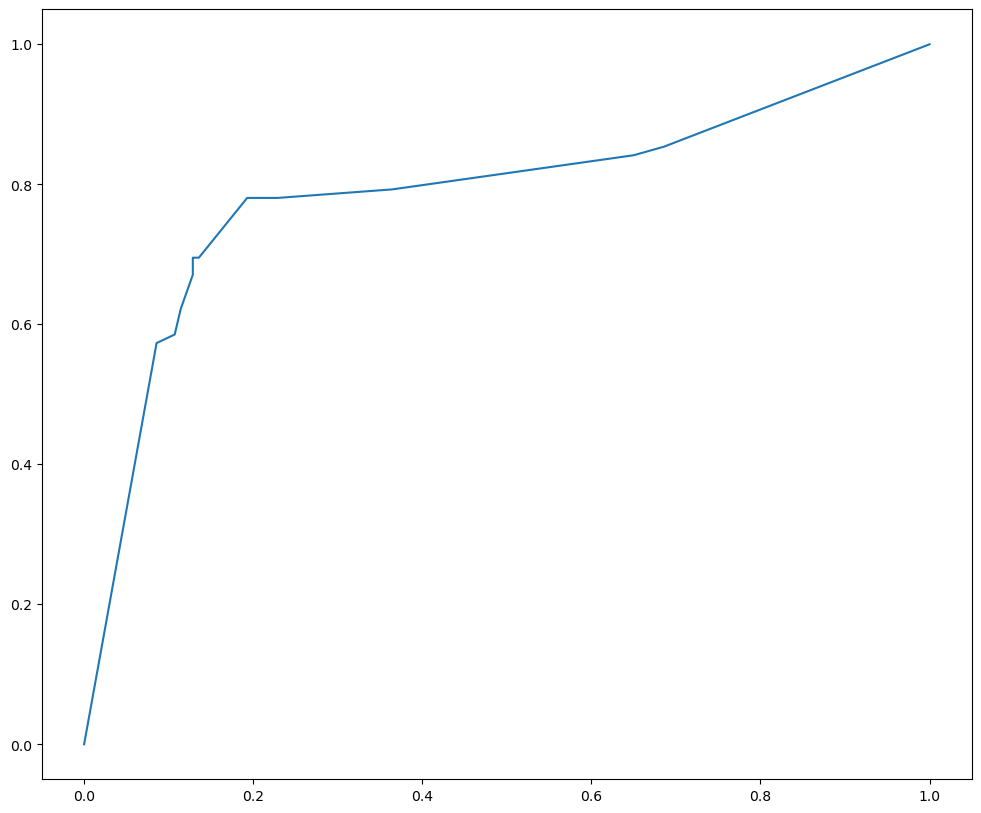

In [33]:
plt.figure(figsize=(12, 10))
fpr, tpr, thresholds = roc_curve(ytall[ttest], ytestDtc[:,1], pos_label=1)
plt.plot(fpr, tpr)
plt.show()

Для сравнения на рисунке также еще показывают ROC AUC кривую, площадь под кривой которой равна 0.5. Эта кривая представляет прямую линию проходящей по диагонали от точки (0;0) до точки (1;1). Величина ROC AUC метрики, равной 0.5, соответствует точности прогноза методом подбрасывания монетки. 
<br> Добавим такую прямую линию, кроме того откорректируем максимальные и минимальные значения осей x и y. <br> Подпишем оси: ось x − False Positive Rate и ось y – True Positive Rate.

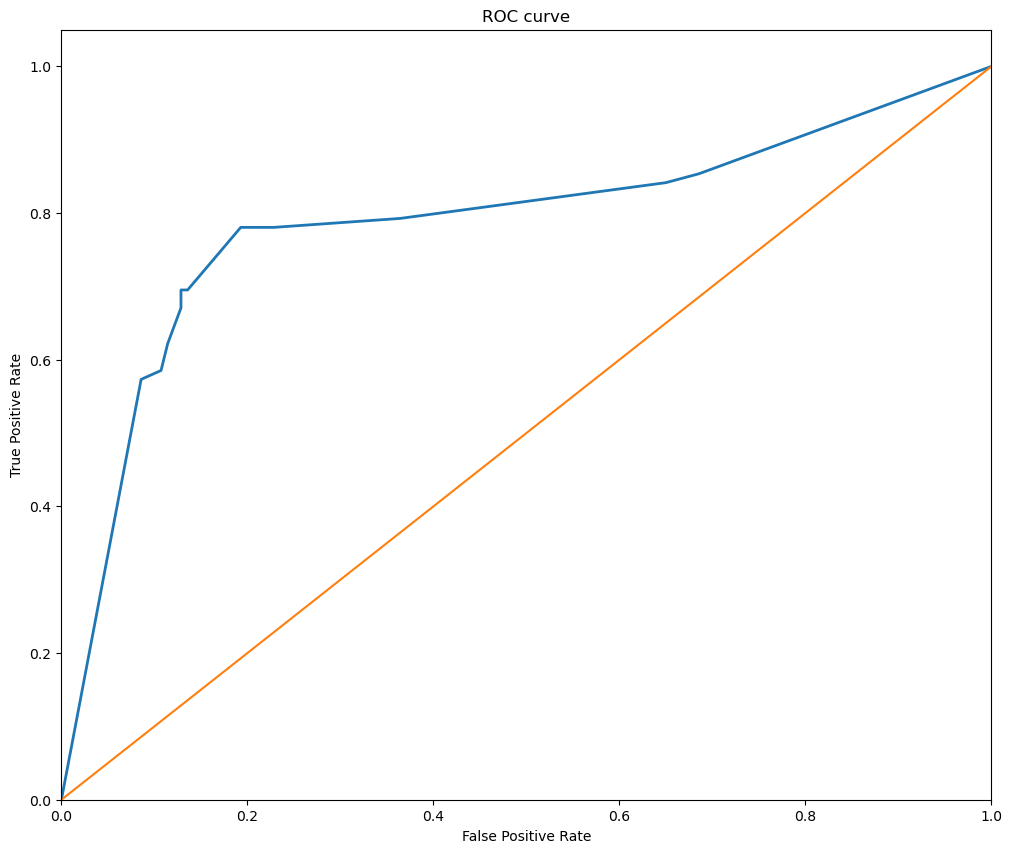

In [34]:
plt.figure(figsize=(12, 10))
fpr, tpr, thresholds = roc_curve(ytall[ttest], ytestDtc[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

### 14. Для вычисления площади под кривой будем использовать функцию roc_auc_score().

In [35]:
roc= roc_auc_score(ytall[ttest], ytestDtc[:,1]) 
print("roc-auc", roc) 

roc-auc 0.7872822299651567


Вместо вероятностной оценки можно использовать бинарную оценку прогнозирования спасения пассажиров. Для этого вычисляем бинарную оценку прогнозирования на основе вероятностной оценки. Используем функцию argmax(), которая возвращает индекс элемента массива с максимальным значением.

In [36]:
print("Mean Score") 
pred = []
for x in ytestDtc:
    ind=np.argmax(x)
    print("index", ind, "x", x)
    pred.append(ind)

Mean Score
index 1 x [0. 1.]
index 1 x [0. 1.]
index 0 x [0.65957447 0.34042553]
index 0 x [0.8 0.2]
index 0 x [0.90243902 0.09756098]
index 0 x [1. 0.]
index 0 x [1. 0.]
index 0 x [0.90243902 0.09756098]
index 0 x [1. 0.]
index 0 x [1. 0.]
index 0 x [1. 0.]
index 1 x [0.13043478 0.86956522]
index 0 x [0.65957447 0.34042553]
index 0 x [0.90243902 0.09756098]
index 0 x [1. 0.]
index 0 x [1. 0.]
index 1 x [0. 1.]
index 0 x [1. 0.]
index 0 x [0.90243902 0.09756098]
index 0 x [0.66666667 0.33333333]
index 1 x [0. 1.]
index 0 x [0.65957447 0.34042553]
index 0 x [1. 0.]
index 0 x [0.90243902 0.09756098]
index 1 x [0. 1.]
index 0 x [1. 0.]
index 0 x [0.8 0.2]
index 0 x [0.8 0.2]
index 1 x [0.13043478 0.86956522]
index 1 x [0. 1.]
index 0 x [1. 0.]
index 1 x [0. 1.]
index 1 x [0.11111111 0.88888889]
index 0 x [1. 0.]
index 0 x [1. 0.]
index 0 x [0.90243902 0.09756098]
index 0 x [0.8 0.2]
index 1 x [0. 1.]
index 1 x [0.11111111 0.88888889]
index 0 x [1. 0.]
index 1 x [0. 1.]
index 1 x [0. 1.]
i

После этого снова вычислим кривую

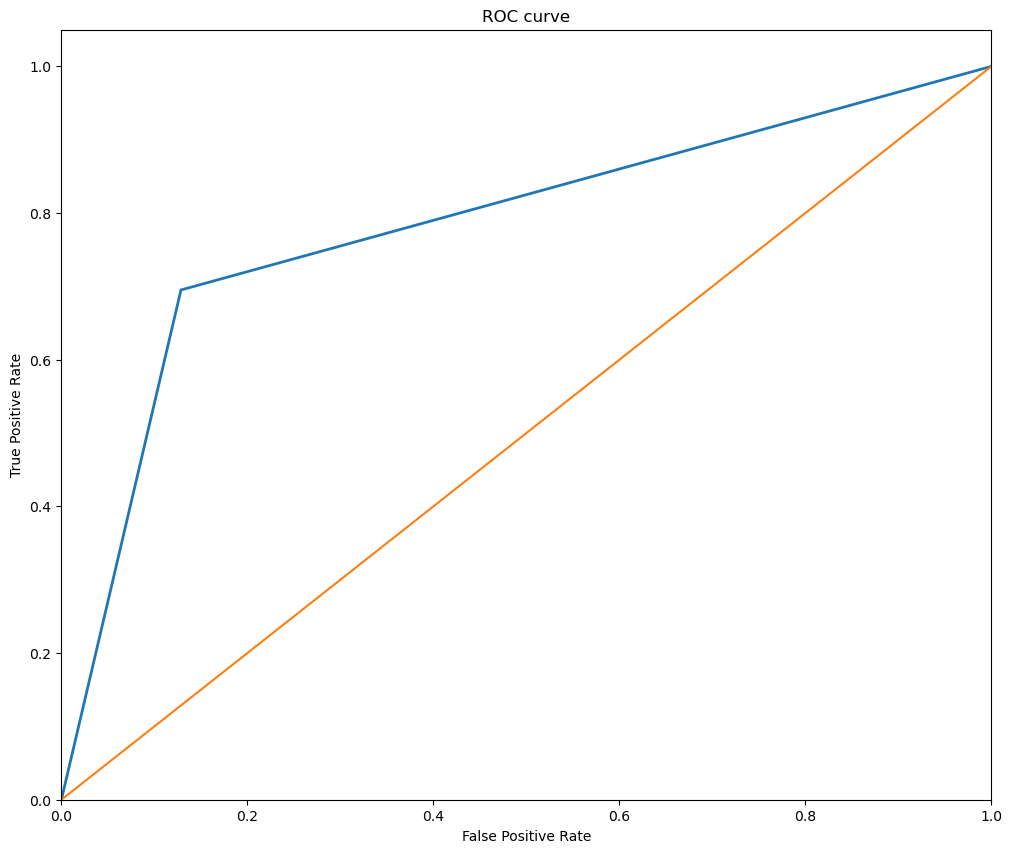

roc-auc 0.7832752613240418


In [37]:
plt.figure(figsize=(12, 10))
fpr, tpr, thresholds = roc_curve(ytall[ttest], pred, pos_label=1)
plt.plot(fpr, tpr, lw=2, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()
roc= roc_auc_score(ytall[ttest],pred) 
print("roc-auc", roc)

ROC AUC кривая отличается от кривой, полученной с помощью вероятностной оценке

После этого определим метрику ROC AUC

In [38]:
roc= roc_auc_score(ytall[ttest],pred) 
print("roc-auc", roc)

roc-auc 0.7832752613240418


Таким образом, вероятностная оценка дает более высокие значения метрики ROC AUC, нежели бинарная.

### 15. У классификатора *DecisionTreeClassifier* важными аргументами являются *max_depth* (максимальная глубина дерева) и *max_features* (максимальное число признаков)

Выбираем оптимальные значения для задачи - используем циклы, внутри которых строим модель с разной глубиной и разным числом признаков. После обучения вычисляем точность прогноза на обучающей выборке и точность прогноза на тестовой выборке 3.

In [39]:
gr=np.arange(1,8,1)
gr1=np.arange(1,12,1)
for i in gr:
    for j in gr1:
        dtc = tree.DecisionTreeClassifier(max_depth =j,max_features =i) #, min_samples_leaf =1)
        dtc=dtc.fit(xtall[ttrain], ytall[ttrain])
        ytrainDtc = dtc.predict_proba(xtall[ttrain])
        ytestDtc = dtc.predict_proba(xtall[ttest])
        sc0= dtc.score(xtall[ttrain], ytall[ttrain])
        sc1= dtc.score(xtall[ttest], ytall[ttest])
        print("DesicionTree max_depth", j, "max_features", i, 
              " Точность обучения", sc0, " Точность тестовая", sc1)

DesicionTree max_depth 1 max_features 1  Точность обучения 0.6113602391629297  Точность тестовая 0.6306306306306306
DesicionTree max_depth 2 max_features 1  Точность обучения 0.6860986547085202  Точность тестовая 0.7522522522522522
DesicionTree max_depth 3 max_features 1  Точность обучения 0.7982062780269058  Точность тестовая 0.8063063063063063
DesicionTree max_depth 4 max_features 1  Точность обучения 0.7802690582959642  Точность тестовая 0.7882882882882883
DesicionTree max_depth 5 max_features 1  Точность обучения 0.7802690582959642  Точность тестовая 0.7972972972972973
DesicionTree max_depth 6 max_features 1  Точность обучения 0.757847533632287  Точность тестовая 0.7297297297297297
DesicionTree max_depth 7 max_features 1  Точность обучения 0.8221225710014948  Точность тестовая 0.7747747747747747
DesicionTree max_depth 8 max_features 1  Точность обучения 0.8071748878923767  Точность тестовая 0.7882882882882883
DesicionTree max_depth 9 max_features 1  Точность обучения 0.899850523168

### 16. Далее строим графики изменения точности на обучающей и тестовой выборке в зависимости от максимальной глубины дерева. снова используем цикл для перебора значений, max_features принимается равным 7

In [40]:
scTs=[]
scTr=[]
gr=np.arange(1,12,1)
for i in gr:
    dtc = tree.DecisionTreeClassifier(max_depth =i,max_features = 7)
    dtc=dtc.fit(xtall[ttrain], ytall[ttrain])
    ytrainDtc = dtc.predict_proba(xtall[ttrain])
    ytestDtc = dtc.predict_proba(xtall[ttest])
    sc0= dtc.score(xtall[ttrain], ytall[ttrain])
    sc1= dtc.score(xtall[ttest], ytall[ttest])
    scTs.append(sc1)
    scTr.append(sc0)
    print("DesicionTree max_depth", i, " Точность обучения", sc0, 
          " Точность тестовая", sc1)


DesicionTree max_depth 1  Точность обучения 0.7862481315396114  Точность тестовая 0.7882882882882883
DesicionTree max_depth 2  Точность обучения 0.7892376681614349  Точность тестовая 0.8018018018018018
DesicionTree max_depth 3  Точность обучения 0.8295964125560538  Точность тестовая 0.8423423423423423
DesicionTree max_depth 4  Точность обучения 0.8340807174887892  Точность тестовая 0.8468468468468469
DesicionTree max_depth 5  Точность обучения 0.8460388639760837  Точность тестовая 0.8558558558558559
DesicionTree max_depth 6  Точность обучения 0.8714499252615845  Точность тестовая 0.8333333333333334
DesicionTree max_depth 7  Точность обучения 0.8953662182361734  Точность тестовая 0.7927927927927928
DesicionTree max_depth 8  Точность обучения 0.9147982062780269  Точность тестовая 0.7972972972972973
DesicionTree max_depth 9  Точность обучения 0.9237668161434978  Точность тестовая 0.7837837837837838
DesicionTree max_depth 10  Точность обучения 0.9327354260089686  Точность тестовая 0.774774

Далее полученные зависимости scTs и scTr отображаем графически

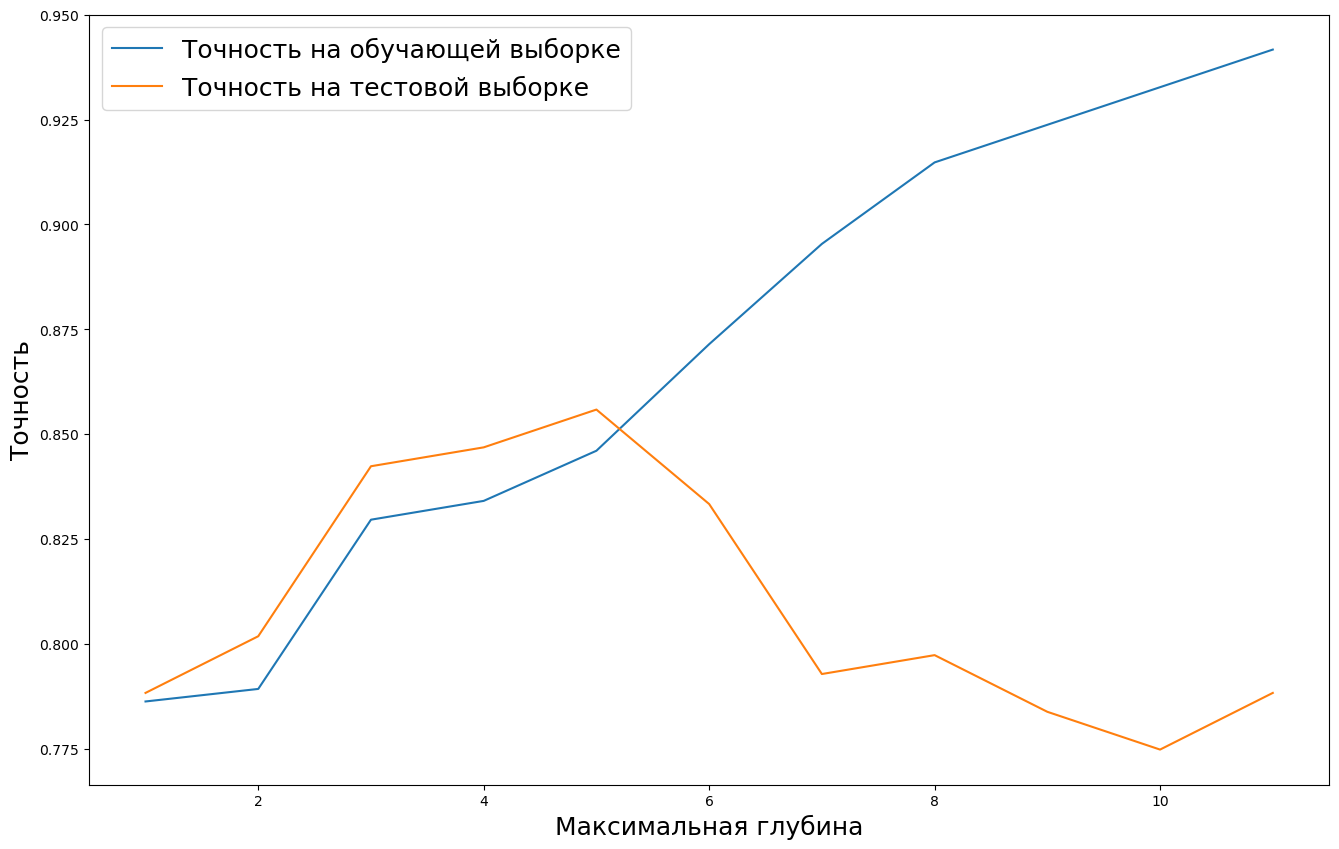

In [41]:
plt.figure( figsize=(16,10))
plt.plot(gr, scTr, label="Точность на обучающей выборке")
plt.plot(gr, scTs,label="Точность на тестовой выборке")
plt.xlabel('Максимальная глубина', fontsize=18)
plt.ylabel('Точность', fontsize=18)
plt.legend(fontsize=18)
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
plt.savefig("DT_scor.jpg", dpi=400)
plt.show()

Как видно из рисунка точность прогнозирования на тестовой выборке падает после того как максимальная глубина дерева превысило значение 5. По сути начиная с максимальной глубины равной 6 мы получаем переобученные модели.

### 17. Крос-валидация является более эффективным способом оценки качества моделей. 

Для создания фолдов (подвыборок) используется класс KFold. В качестве аргументов задается длина исходной выборки, n_folds – количество фолдов, shuffle – логический параметр (если он равен True, то данные 
перед разбиением перемешиваются), random_state – псевдо случайное число, которое используется для сдвига в генераторе случайных чисел. Генератор случайных чисел используется, если shuffle равно True. Выполяем
разбиение нашей выборки на 5 фолдов.

In [42]:
!pip install --upgrade --user scikit-learn

In [43]:
from sklearn.model_selection import KFold
import numpy as np

ntrain = bashkatova.shape[0]
SEED = 111123435 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(n_splits=NFOLDS, random_state=SEED, shuffle=True)

### 18. Выполним поиска оптимальных параметров.
<br>Для этого используем циклы с перебором параметров max_depth (от 1до 11) и max_features (от 1 
до 7). В теле этого двойного цикла вложим цикл перебора фолдов, нидексы которых берем из объекта kf. Результаты прогноза сохраняем в массиве pred_test, который создается перед циклом методом np.zeros(). Данный метод создает двумерный нулевой массив с указанными размерами. В результате в процессе работы для каждого обучающего фолда, создается модель, которая проверяется на тестовом фолде. Результаты прогноза сохраняются 
в массиве pred_test. После завершения цикла мы имеем массив с тестовыми прогнозами, поэтому мы можем вычислить метрику ROC AUC. Все эти вычисления повторяются ждя каждой комбинации i, j. Наилучшие (с точки зрения метрики ROC AUC) значения i, j сохраняются

In [44]:
gr = np.arange(1, 8, 1)
gr1 = np.arange(1, 12, 1)
acc = 0

for i in gr:
    for j in gr1:
        sc = 0
        pred_test = np.zeros((ntrain, 2))
        for train_idx, test_idx in kf.split(bashkatova):
            dtc = tree.DecisionTreeClassifier(max_depth=j, max_features=i)
            dtc = dtc.fit(xtall[train_idx], ytall[train_idx])
            pred_test[test_idx] = dtc.predict_proba(xtall[test_idx])
        ac = roc_auc_score(ytall, pred_test[:, 1]) 
        if ac > acc:
            acc = ac
            md = j
            mf = i
        print("DesicionTree: max_depth", j, "max_features", i, " Точность ROC AUC", ac)

DesicionTree: max_depth 1 max_features 1  Точность ROC AUC 0.5585514332278785
DesicionTree: max_depth 2 max_features 1  Точность ROC AUC 0.6965482163210089
DesicionTree: max_depth 3 max_features 1  Точность ROC AUC 0.7723186229082116
DesicionTree: max_depth 4 max_features 1  Точность ROC AUC 0.8010284515173788
DesicionTree: max_depth 5 max_features 1  Точность ROC AUC 0.7953882124862856
DesicionTree: max_depth 6 max_features 1  Точность ROC AUC 0.7991723388617262
DesicionTree: max_depth 7 max_features 1  Точность ROC AUC 0.8087990924487904
DesicionTree: max_depth 8 max_features 1  Точность ROC AUC 0.7782784222243526
DesicionTree: max_depth 9 max_features 1  Точность ROC AUC 0.7654933478200662
DesicionTree: max_depth 10 max_features 1  Точность ROC AUC 0.7600741379861311
DesicionTree: max_depth 11 max_features 1  Точность ROC AUC 0.7551555725987708
DesicionTree: max_depth 1 max_features 2  Точность ROC AUC 0.7114051065733551
DesicionTree: max_depth 2 max_features 2  Точность ROC AUC 0.7

После выполнения поиска, распечатаем наилучшие значения параметров 
дерева решений.

In [45]:
print("best: max depth", md, "max_features", mf, "Наилучшая метрика ROC AUC", acc)

best: max depth 6 max_features 3 Наилучшая метрика ROC AUC 0.8474259419039402


Выполним построение моделей с наилучшими параметрами настройки

In [46]:
pred_test = np.zeros((ntrain, 2))
for train_idx, test_idx in kf.split(bashkatova):
    dtc = tree.DecisionTreeClassifier(max_depth=5, max_features=3)  #, min_samples_leaf=1)
    dtc = dtc.fit(xtall[train_idx], ytall[train_idx])
    pred_test[test_idx] = dtc.predict_proba(xtall[test_idx])

### 19. Построим кривую ROC AUC, используя уже знакомый нам код:

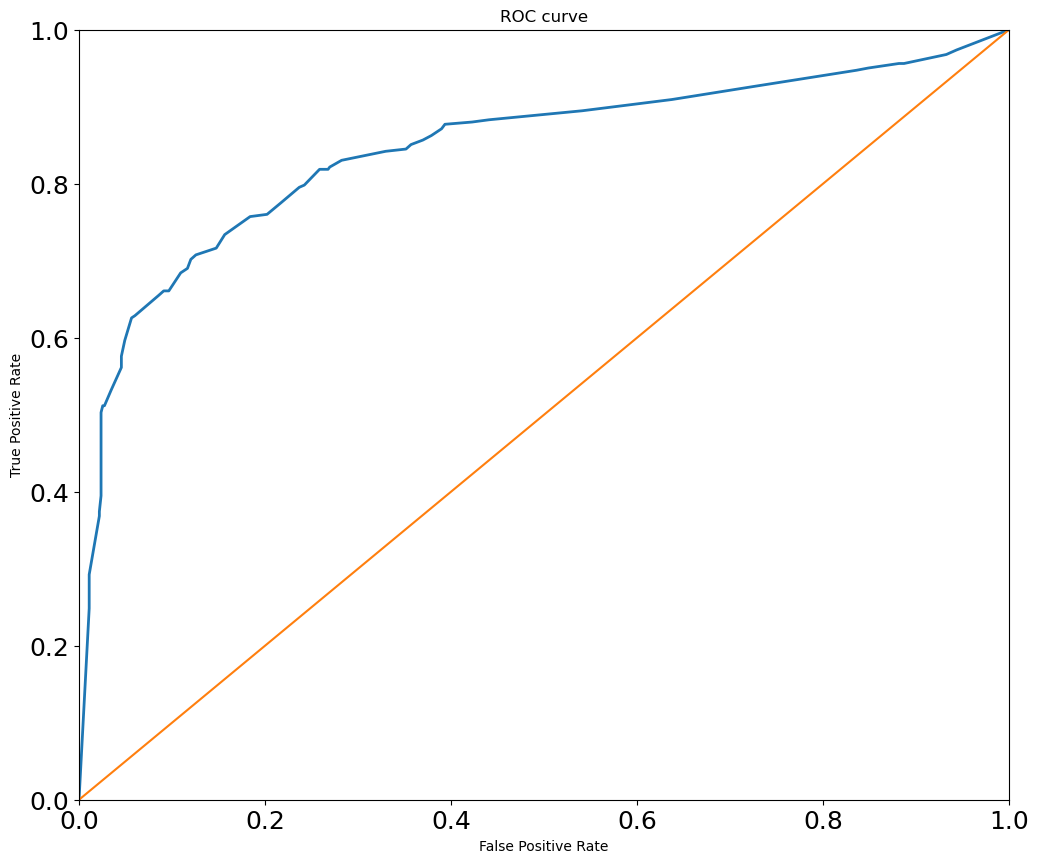

In [47]:
plt.figure(figsize=(12, 10))
fpr, tpr, thresholds = roc_curve(ytall, pred_test[:,1], pos_label=1)
plt.plot(fpr, tpr, lw=2, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()


Вычислим метрику ROC AUC

In [48]:
roc= roc_auc_score(ytall, pred_test[:,1]) 
print("roc-auc", roc)

roc-auc 0.8449786427209492


### 20. Вычислим другие характеристики точности. 
Для этого требуется вычислить категориальную оценку прогноза. 

In [67]:
print("Binary output") 
pred=[]
for x in pred_test:
    pred.append(np.argmax(x))

Binary output


Далее используем методы для построения отчета и матрицы неточностей

In [50]:
print(classification_report( ytall, pred, target_names=lab, digits=4))
print(confusion_matrix(ytall , pred, labels=range(2)))

              precision    recall  f1-score   support

    Спаслись     0.8114    0.9089    0.8574       549
     Утонули     0.8188    0.6608    0.7314       342

    accuracy                         0.8137       891
   macro avg     0.8151    0.7849    0.7944       891
weighted avg     0.8142    0.8137    0.8090       891

[[499  50]
 [116 226]]


### 21. Для улучшения модели и лучшей ее интерпретации требуется определить какие показатели наиболее значимыми и важными для прогнозирования вероятности спасения пассажиров. 
Основная цель определения важности переменных − это оценка того, какие переменные, когда, где и как влияют на решаемую задачу.Для определения коэффициентов важности показателей используется атрибут feature_importances_.

In [51]:
imp= dtc.feature_importances_
imp

array([0.14059922, 0.53022461, 0.11517082, 0.04068004, 0.02023387,
       0.14101341, 0.01207804])

Для того чтобы этот массив был более понятным оформим его в виде таблицы rfImp

In [68]:
imp= dtc.feature_importances_
rfImp = pd.DataFrame(imp, columns=['imp'])
title1=bashkatova.columns
rfImp['title']=title1
rfImp = rfImp.sort_values('imp', ascending = False)
rfImp.head(7)

,imp,title
1,0.530225,Sex
5,0.141013,Fare
0,0.140599,Pclass
2,0.115171,Age
3,0.040680,SibSp
4,0.020234,Parch
6,0.012078,Embarked


## Визуализация модели (только если установлены библиотеки pyplotplus)


### 22. Для визуализации модели используем функцию *export_graphviz()* класса Дерево решений. 
Этот метод формирует текстовый массив, который можно преобразовать в графический с помощью метода *graph_from_dot_data()* библиотеки *pydotplus*. 
<br>Функция export_graphviz() имеет следующие аргументы:
1) ссылка на объект обученной модели;
2) feature_names – массив имен показателей;
3) class_names –массив имен целевых классов;
4) out_file – имя выходного файла;
5) filled – если параметр имеет значение True, то для каждого узла указывается приоритетный класс;
6) rounded – если параметр имеет значение True, то узлы рисуются с закругленными углами и используются шрифт Helvetica вместо Times-Roman

In [53]:
!pip install pydotplus

In [54]:
!pip install graphviz

Чтобы посмотреть дерево решений, не используя графический редактор, прочитаем графический файл и отобразим его на картинке с помощью библиотеки matplotlib. Сначала используя функцию imread() прочитаем наш файл. При этом функция возвращает числовой массив типа numpy.array. Для изображений в оттенках серого возвращается массив MxN. Для изображений RGB возвращаемое значение равно MxNx3. Для изображений RGBA возвращаемое значение − MxNx4. Формат RGBA похож по синтаксису на RGB, но включает в себя дополнительный канал, задающий 
прозрачность элемента. 

In [56]:
import matplotlib.image as mpimg
img=mpimg.imread("DC.png")
img

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       ...,

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1.

Класс figure и метод imshow() для отображения графического файла

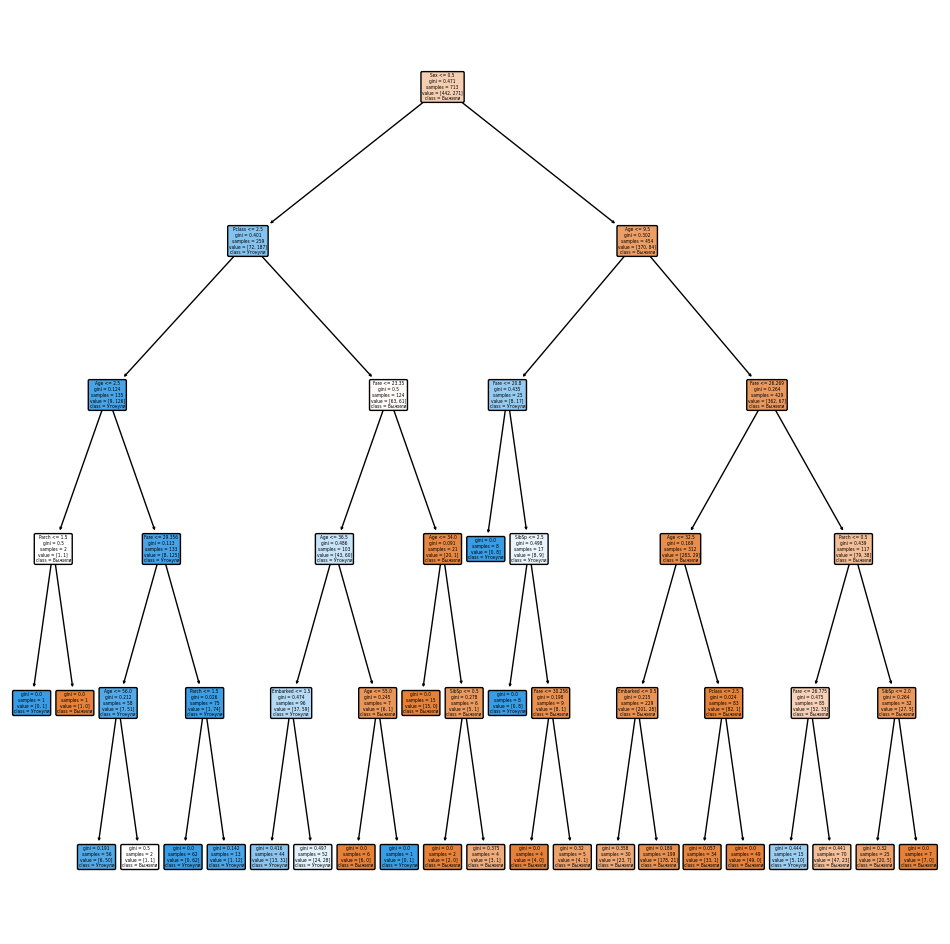

In [55]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(dtc, feature_names=title1.tolist(), class_names=["Выжили", "Утонули"], filled=True, rounded=True, ax=ax)
plt.savefig("DC.png")

**Метод Random Forest**
### 23. Результаты выбора наилучших параметров обучения модели

При использовании кросс-валидации разбиваем выборку на 5 фолдов и выполняем построение 5 моделей. 
Поэтому при появлении новых данных для их классификации у нас имеется 5 моделей. 
Самый простой путь выполнить классификацию с помощью 5 моделей, а затем провести осреднение. 
Таким образом мы используем самый простой вариант ансамбля моделей. 
Random forest представляет метод, который строит не одно дерево решений, а много деревьев (лес деревьев). 
Таким образом, наша задача − построить модель прогноза вероятности спасения пассажиров методом случайных 
деревьев (Random forest). На первом шаге выполняем поиск наулучших параметров: число деревьев и максимальная глубина дерева.

In [57]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
gr = np.arange(1, 45, 1)
gr1 = np.arange(1, 12, 1)
acc = 0
kf = KFold(n_splits=NFOLDS) 
for i in gr:
    for j in gr1:
        scc = 0
        pred_test = np.zeros((ntrain, 2))
        for ttrain, ttest in kf.split(xtall):
            rfc = RandomForestClassifier(n_estimators=i, max_depth=j)
            rfc.fit(xtall[ttrain], ytall[ttrain]) 
            pred_test[ttest] = rfc.predict_proba(xtall[ttest])
            scc += rfc.score(xtall[ttest], ytall[ttest])
        ac = roc_auc_score(ytall, pred_test[:, 1]) 
        scc = scc / NFOLDS
        if ac > acc:
            acc = ac
            md = j
            mf = i
            print("Random Forest: max_depth", j, "n_estimators", i, "ROC AUC", ac, "Точность", scc)

Random Forest: max_depth 1 n_estimators 1 ROC AUC 0.7157058554096231 Точность 0.6878475927437073
Random Forest: max_depth 2 n_estimators 1 ROC AUC 0.7775168035449886 Точность 0.7620048961144937
Random Forest: max_depth 4 n_estimators 1 ROC AUC 0.8017820811896165 Точность 0.744146632352018
Random Forest: max_depth 2 n_estimators 2 ROC AUC 0.8034091756409847 Точность 0.7744334944447931
Random Forest: max_depth 3 n_estimators 2 ROC AUC 0.8201434825679865 Точность 0.8058313979034587
Random Forest: max_depth 6 n_estimators 2 ROC AUC 0.8366913793287103 Точность 0.7857071119201556
Random Forest: max_depth 7 n_estimators 2 ROC AUC 0.8488879302080337 Точность 0.7789090452576737
Random Forest: max_depth 5 n_estimators 3 ROC AUC 0.8493113475857222 Точность 0.8081350825434687
Random Forest: max_depth 4 n_estimators 4 ROC AUC 0.8508665409729546 Точность 0.8148138848785387
Random Forest: max_depth 5 n_estimators 4 ROC AUC 0.8514124564599113 Точность 0.8136840123030569
Random Forest: max_depth 6 n_es

При поиске наилучших параметров вычисляется точность прогноза, как среднеарифметическое точность прогнозирования отдельных фолдов.

Распечатаем наилучшие показатели:

In [58]:
print("best: max depth", md, "n_estimators", mf, "Наилучшая метрика ROC AUC", acc)

best: max depth 6 n_estimators 9 Наилучшая метрика ROC AUC 0.8703037953109856


Пробуем повторить результат

In [59]:
scc = 0
pred_test = np.zeros((ntrain, 2))

for ttrain, ttest in kf.split(xtall):
    rfc = RandomForestClassifier(n_estimators=13, max_depth=9)
    rfc.fit(xtall[ttrain], ytall[ttrain]) 
    pred_test[ttest] = rfc.predict_proba(xtall[ttest])
    scc += rfc.score(xtall[ttest], ytall[ttest])

roc = roc_auc_score(ytall, pred_test[:, 1])
scc = scc / NFOLDS
print("ROC AUC:", roc, "Accuracy:", scc)

ROC AUC: 0.8576864900563492 Accuracy: 0.8170987383089574


Полученный результат не совпадает с тем, что получен при поиске наилучших параметров. Это связано с тем, что при построении модели присутствует случайный фактор. Если начнем повторять выше представленный код, то для каждого повторения будем получать разный результат

### 24. Код функций для сохранения и загрузки моделей

Чтобы избежать этого недостатка, нам требуется при выборе наилучших параметров сохранять наилучшие модели. Напишем две функции, одна из которых сохраняет модель в файл, а другая загружает модель из файла. 
Для этого используем библиотеку _pickle.
Модуль _pickle реализует алгоритм сериализации и десериализации объектов Python. Pickling − процесс преобразования объекта Python в поток байтов, а unpickling − обратная операция, в результате которой поток байтов преобразуется обратно в Python-объект. Так как поток байтов легко можно 
записать в файл, модуль pickle широко применяется для сохранения и загрузки сложных объектов в Python.

In [60]:
import _pickle as cPickle
def SaveModel(name, rfc):
    with open(name, 'wb') as f:
        cPickle.dump(rfc, f)
def LoadModel(name):
    with open(name, 'rb') as f:
        rf = cPickle.load(f)
    return rf

Дополните код по поиску наилучших параметров обучения операторами сохранения модели в файл. Так как строим одну модель на каждый фолд, нам нужно сохранить пять моделей. Поэтому в рамках двойного цикла перебора параметров создайте массив modl, в который для каждого сочетания параметров будут сохраняться модели с помощью функции append()

In [61]:
gr = np.arange(1, 45, 1)
gr1 = np.arange(1, 12, 1)
acc = 0

for i in gr:
    for j in gr1:
        scc = 0
        modl = []
        pred_test = np.zeros((ntrain, 2))
        for ttrain, ttest in kf.split(xtall):
            rfc = RandomForestClassifier(n_estimators=i, max_depth=j)
            rfc.fit(xtall[ttrain], ytall[ttrain])
            pred_test[ttest] = rfc.predict_proba(xtall[ttest])
            modl.append(rfc)
            scc += rfc.score(xtall[ttest], ytall[ttest])
        ac = roc_auc_score(ytall, pred_test[:, 1])
        scc = scc / NFOLDS
        if ac > acc:
            acc = ac
            for kk in np.arange(0, NFOLDS, 1):
                s = "RF" + str(kk) + ".model"
                SaveModel(s, modl[kk])
            md = j
            mf = i
            print("Random Forest: max_depth", j, "n_estimators", i, " ROC AUC", ac, " Точность", scc)


Random Forest: max_depth 1 n_estimators 1  ROC AUC 0.6689009256596257  Точность 0.6724373862281088
Random Forest: max_depth 2 n_estimators 1  ROC AUC 0.7484634476293954  Точность 0.728516728391187
Random Forest: max_depth 3 n_estimators 1  ROC AUC 0.7882513661202186  Точность 0.7577176573975268
Random Forest: max_depth 4 n_estimators 1  ROC AUC 0.8140425441259493  Точность 0.7676228736425836
Random Forest: max_depth 5 n_estimators 1  ROC AUC 0.8191874647152184  Точность 0.7923419747661792
Random Forest: max_depth 4 n_estimators 2  ROC AUC 0.8327687768297489  Точность 0.7901638315234449
Random Forest: max_depth 5 n_estimators 2  ROC AUC 0.8355143322787846  Точность 0.7857573284790659
Random Forest: max_depth 4 n_estimators 3  ROC AUC 0.8391280265021996  Точность 0.793528340970435
Random Forest: max_depth 5 n_estimators 3  ROC AUC 0.84401197285868  Точность 0.782298662984119
Random Forest: max_depth 5 n_estimators 4  ROC AUC 0.8527812396808658  Точность 0.7946519364760529
Random Forest: 

Для прогнозирования используем функцию загрузки модели

In [62]:
scc=0
pred_test = np.zeros((ntrain,2))
for kk, (ttrain, ttest) in enumerate(kf.split(xtall)):
    rfc = RandomForestClassifier(n_estimators=26, max_depth=6)
    s = "RF" + str(kk) + ".model"
    print(s)
    rfc = LoadModel(s) 
    pred_test[ttest] = rfc.predict_proba(xtall[ttest])
    scc += rfc.score(xtall[ttest], ytall[ttest])

roc = roc_auc_score(ytall, pred_test[:,1]) 
scc = scc / NFOLDS
print("roc_auc", roc, "Accuracy", scc)

RF0.model
RF1.model
RF2.model
RF3.model
RF4.model
roc_auc 0.8709216118620778 Accuracy 0.828278199736363


### 25. Используем функции estim() для оценки полученных результатов

In [63]:
estim(pred_test[:,1], ytall, 0.5)

Precission:  0.8278145695364238 класс 0 спаслись 604  Из них правильно спрогнозировано = 500 , ошибочно= 104
Precission:  0.8292682926829268 класс 1 утонуло 738  Из них правильно спрогнозировано = 238 , ошибочно= 500
Recall:  0.9107468123861566 класс 0 спаслись
Recall:  0.695906432748538 класс 1 утонуло
Точность распознавания  0.8282828282828283  precission recall


0.8282828282828283

Использование методов classification_report() и confusion_matrix() для вычисление различных метрик, оценивающих точность прогнозирования, и 
вычисления матрицы неточностей. 

In [64]:
pred=[]
for x in pred_test:
    pred.append(np.argmax(x))
print(classification_report( ytall, pred, target_names=lab, digits=4))
print(confusion_matrix( ytall , pred, labels=range(2)))

              precision    recall  f1-score   support

    Спаслись     0.8278    0.9107    0.8673       549
     Утонули     0.8293    0.6959    0.7568       342

    accuracy                         0.8283       891
   macro avg     0.8285    0.8033    0.8120       891
weighted avg     0.8284    0.8283    0.8249       891

[[500  49]
 [104 238]]


Создание структуры rfImp со столбцами 'title' и 'imp'

In [65]:
imp =rfc.feature_importances_
rfImp = pd.DataFrame(imp, columns=['imp'])
rfImp['title']=title1

Сортировка коэффициентов важности в порядке их убывания.

In [66]:
rfImp = rfImp.sort_values('imp', ascending = False)
rfImp

,imp,title
1,0.394534,Sex
5,0.197739,Fare
2,0.161088,Age
0,0.104604,Pclass
3,0.059776,SibSp
6,0.042434,Embarked
4,0.039825,Parch
